In [114]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *


In [115]:
df = pd.read_csv('data.csv')
df.info()
df.describe()
df.isna().mean().sort_values(ascending=False).multiply(100)[lambda x: x>0]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   occur_date       1274 non-null   object 
 1   ship_categ       1274 non-null   object 
 2   ship_brand       1066 non-null   object 
 3   ship_power       1066 non-null   float64
 4   ship_eng_nb      1066 non-null   float64
 5   ship_eng_year    1066 non-null   float64
 6   ship_build_year  1066 non-null   float64
 7   ship_hull        1066 non-null   object 
 8   ship_length      1066 non-null   float64
 9   ship_tonnage     1066 non-null   float64
 10  claim_cost       1274 non-null   float64
 11  head_quarter     1045 non-null   object 
dtypes: float64(7), object(5)
memory usage: 119.6+ KB


,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_length,ship_tonnage,claim_cost
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1274.000000
mean,434.957786,1.070356,1996.525328,1979.853659,7.918668,30.898218,25.563658
std,294.940807,0.255867,6.206298,11.096130,2.997789,48.347233,159.226597
min,9.000000,1.000000,1967.000000,1932.000000,3.100000,0.600000,-109.900000
25%,239.000000,1.000000,1993.000000,1973.250000,5.900000,5.200000,1.200000
50%,367.000000,1.000000,1997.000000,1978.000000,7.200000,10.600000,4.100000
75%,567.000000,1.000000,2001.000000,1987.000000,9.350000,33.275000,10.975000
max,2517.000000,2.000000,2006.000000,2005.000000,21.000000,349.800000,3765.400000


head_quarter       17.974882
ship_brand         16.326531
ship_power         16.326531
ship_eng_nb        16.326531
ship_eng_year      16.326531
ship_build_year    16.326531
ship_hull          16.326531
ship_length        16.326531
ship_tonnage       16.326531
dtype: float64

,occur_date,ship_categ,ship_brand,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_hull,ship_length,ship_tonnage,claim_cost,head_quarter
0,2003-01-03,Filer,PERKINS,133.0,2.0,1998.0,1998.0,Alluminium Alloy,6.3,6.6,1.4,Arcachon
1,2003-01-03,Filer,NaN,372.0,2.0,2005.0,1981.0,Alluminium Alloy,13.7,186.6,3.9,La Cotiniere
2,2003-01-03,Troller,DEUTZ,443.0,1.0,1995.0,1979.0,polyester,6.7,14.2,0.6,Saint-Quay-Portrieux
3,2003-01-04,Trawler,Cummins,266.0,1.0,1994.0,1965.0,~Wood,6.4,10.1,2.7,Audierne
4,2003-01-04,Crab boat,BONI VALMET,145.0,1.0,1994.0,1969.0,Wood,5.2,4.2,1.5,Concarneau
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2006-05-27,Filer,Cummins,222.0,1.0,1976.0,1973.0,~Polyester,4.9,3.1,0.4,Grandcamp Maisy
1270,2006-05-27,Fishing vessel,YAMAHA,124.0,1.0,2005.0,1972.0,~Polyester,3.8,2.2,1.4,La Rochelle
1271,2006-05-29,Other,Iveco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,Granville
1272,2006-05-31,Filer,BAUDOUIN,354.0,1.0,1991.0,1981.0,Polyester,7.7,15.5,8.9,La Cotiniere


In [116]:
col_has_na = df.columns[df.isna().any()]
df[col_has_na].isna().mean().multiply(100).sort_values(ascending=False)

head_quarter       17.974882
ship_brand         16.326531
ship_power         16.326531
ship_eng_nb        16.326531
ship_eng_year      16.326531
ship_build_year    16.326531
ship_hull          16.326531
ship_length        16.326531
ship_tonnage       16.326531
dtype: float64

In [117]:
k = 3
top_k = df.ship_brand.value_counts().nlargest(k).index

# df.occur_date.dt.month()

months = pd.to_datetime(df.occur_date).dt.month

df.query("ship_brand in @top_k").groupby(months).claim_cost.mean().nlargest(1)
# df[df.ship_brand.isin(top_k)].groupby(months).claim_cost.mean().nlargest(1) # same as above


occur_date
5    77.467347
Name: claim_cost, dtype: float64

In [118]:
names = df.ship_categ.value_counts()[lambda s: s.lt(10)].index
df.ship_categ[df.ship_categ.isin(names)] = 'Other' 

df.ship_categ.replace(names, 'Other', inplace=True) # M2. good way 





/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_67326/1428688823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ship_categ[df.ship_categ.isin(names)] = 'Other'


In [122]:
temp = df.select_dtypes('number')
temp = temp.fillna(temp.median())

df.select_dtypes('number').isna().sum()

ship_power         208
ship_eng_nb        208
ship_eng_year      208
ship_build_year    208
ship_length        208
ship_tonnage       208
claim_cost           0
dtype: int64

In [126]:
# M1 
df_num = df.select_dtypes('number')
df[df_num.columns] = df_num.fillna(df_num.median()) 

# M2
cols_num = df.select_dtypes('number').columns 
df[cols_num] = df[cols_num].fillna(df[cols_num].median())

# M3 
df = df.fillna(df.select_dtypes('number').median())

In [147]:
# df
# df.ship_hull.value_counts()
# df.ship_hull.value_counts()
# df.ship_hull.str.title().value_counts()
df['ship_hull'] = df.ship_hull.str.title().str.replace(r'[^a-zA-Z\s]', '', regex=True)
# df.ship_hull.value_counts()

Polyester              511
Wood                   249
Steel                  165
Alluminium Alloy       135
Wood Epoxy               4
Reinforced Plastic       1
Plasticized Plywood      1
Name: ship_hull, dtype: int64

In [156]:
df = df.fillna(df.select_dtypes(object).mode().loc[0])

In [159]:
df_num = df.select_dtypes('number')

df[df_num.columns] = (df_num - df_num.mean())/df_num.std()

In [170]:
X = df.drop(['claim_cost', 'occur_date', 'ship_brand', 'head_quarter'], axis=1)
y = df.claim_cost

In [171]:
for x in X.select_dtypes(object).columns:
    X[x].value_counts()

Trawler             380
Filer               318
Other               226
Crab boat           137
Troller              85
Fishing vessel       45
Speedboat            29
Shellfish boat       16
Passenger vessel     14
Coast catamaran      13
Dredger              11
Name: ship_categ, dtype: int64

Polyester              719
Wood                   249
Steel                  165
Alluminium Alloy       135
Wood Epoxy               4
Reinforced Plastic       1
Plasticized Plywood      1
Name: ship_hull, dtype: int64

In [174]:
X = pd.get_dummies(X)
X.shape

(1274, 24)

X_train.shape = (891, 24)
X_test.shape  = (383, 24)
y_train.shape = (891,)
y_test.shape  = (383,)

train-test ratio = 2.3263707571801566


0.7487958372244914

0.711616215941155

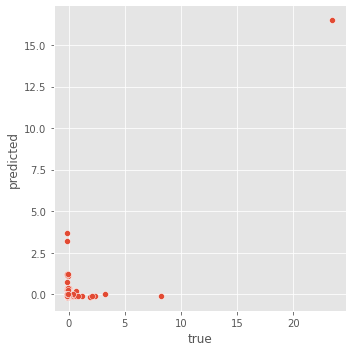

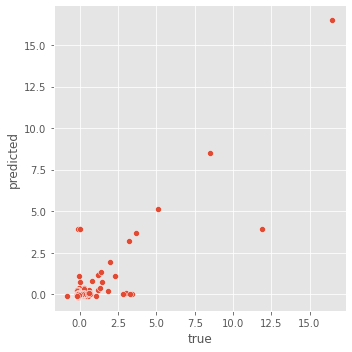

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

sanity_check_dataset(X_train, X_test, y_train, y_test)

model = DecisionTreeRegressor(max_depth=8).fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

y_pred = model.predict(X_test)
sns.relplot(x=y_test, y=y_pred, kind='scatter').set(ylabel='predicted', xlabel='true')
sns.relplot(x=y_train, y=model.predict(X_train), kind='scatter').set(ylabel='predicted', xlabel='true')

In [144]:
"heewk few few".title()

'Heewk Few Few'